Import needed Libraries

In [377]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
import math

Upload and combine Datasets

In [378]:
df1=  pd.read_csv('AdvWorksCusts.csv')
df2=  pd.read_csv('AW_BikeBuyer.csv')
df = pd.concat([df1, df2['BikeBuyer']], axis =1)
print(df.shape)

(16519, 24)


In [379]:
df.head(3)

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,BikeBuyer
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,...,Bachelors,Professional,M,M,1,0,0,2,137947,0
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,...,Bachelors,Professional,M,S,0,1,3,3,101141,1
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,...,Bachelors,Professional,M,M,1,1,3,3,91945,0


In [380]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16519 entries, 0 to 16518
Data columns (total 24 columns):
CustomerID              16519 non-null int64
Title                   88 non-null object
FirstName               16519 non-null object
MiddleName              9534 non-null object
LastName                16519 non-null object
Suffix                  2 non-null object
AddressLine1            16519 non-null object
AddressLine2            276 non-null object
City                    16519 non-null object
StateProvinceName       16519 non-null object
CountryRegionName       16519 non-null object
PostalCode              16519 non-null object
PhoneNumber             16519 non-null object
BirthDate               16519 non-null object
Education               16519 non-null object
Occupation              16519 non-null object
Gender                  16519 non-null object
MaritalStatus           16519 non-null object
HomeOwnerFlag           16519 non-null int64
NumberCarsOwned         16519

Check and Remove Duplicates

In [381]:
sum(df.duplicated())

98

In [382]:
df.drop_duplicates(subset = 'CustomerID', keep = 'first', inplace = True)
df.shape

(16404, 24)

Drop Unnecessary Columns

In [383]:
df_new = df.drop(['City', 'StateProvinceName', 'CustomerID', 'Title', 'FirstName', 'MiddleName', 'LastName', 'Suffix', 
                  'AddressLine1', 'AddressLine2','PostalCode', 'PhoneNumber', 'BirthDate', 'City'], axis =1)
print(df_new.shape)

(16404, 11)


Check for missing value

In [384]:
df_new.isnull().values.any()

False

Visualize the Dataset

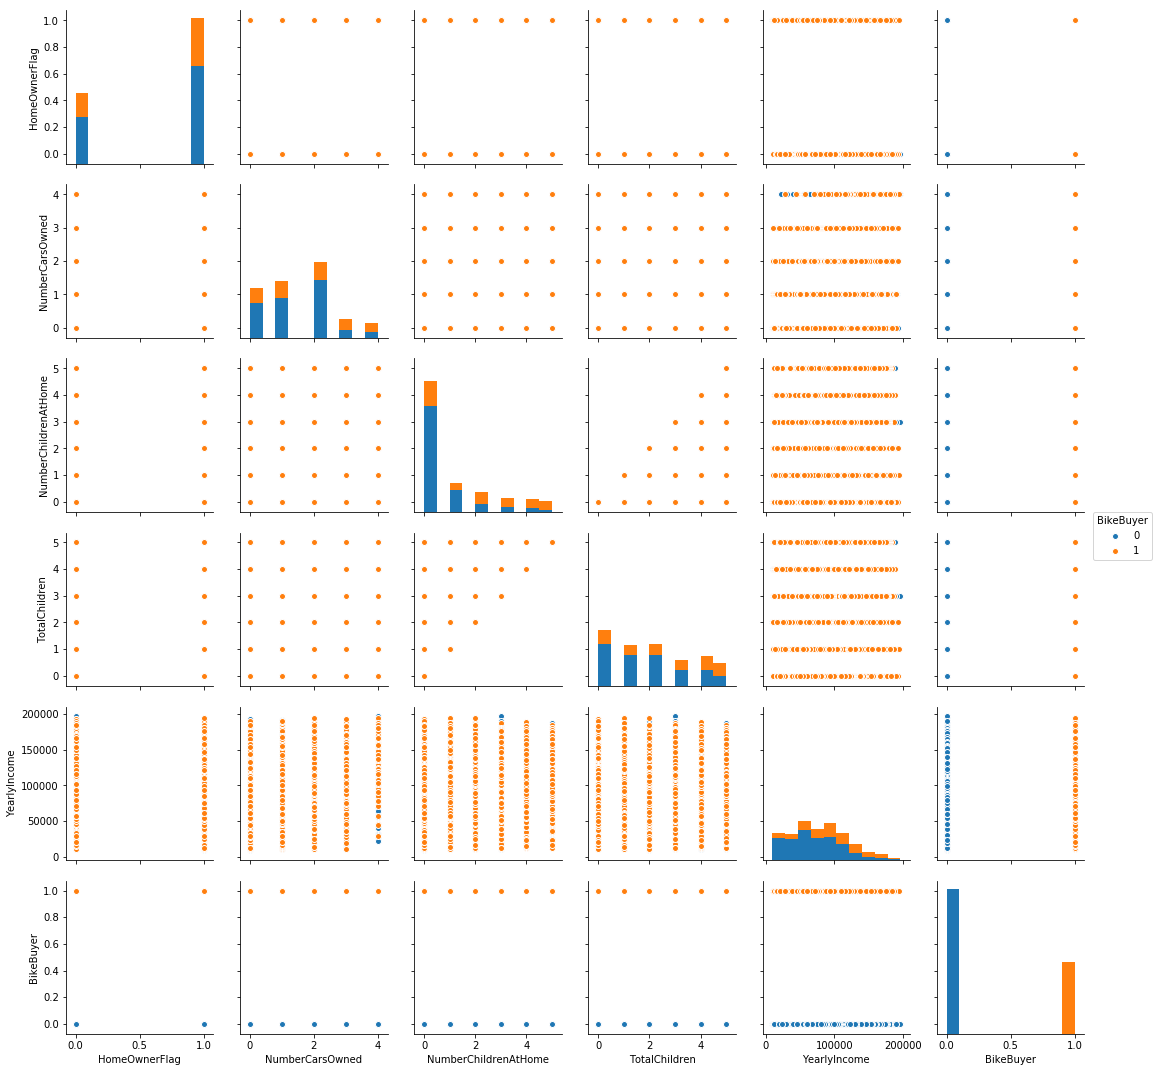

In [385]:
sns.pairplot(df_new, hue = 'BikeBuyer' )

Convert  Birthdate Column to Age

In [386]:
df_new['Age'] = pd.to_datetime('1998-01-01') - pd.to_datetime(df['BirthDate'])
df_new['Age'] = df_new['Age'].astype('timedelta64[D]').astype(int)
df_new['Age'] = df_new['Age']/365
df_new['Age'].head(3)

0    31.756164
1    32.657534
2    32.410959
Name: Age, dtype: float64

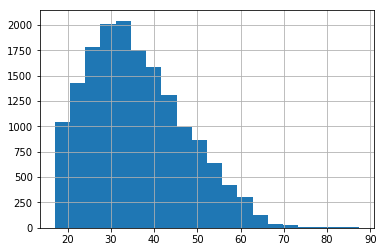

In [387]:
df_new['Age'].hist(bins=20)

Tranform Numerical Data (age & Yearly Income) to resemble normal distribution

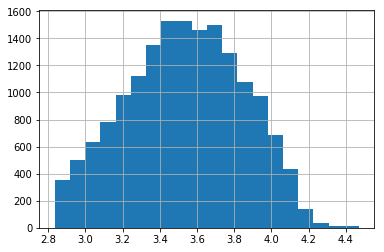

In [388]:
df_new['Age'] = df_new['Age'].apply(np.log)
df_new['YearlyIncome'] = df_new['YearlyIncome']**0.5
df_new['Age'].hist(bins = 20)

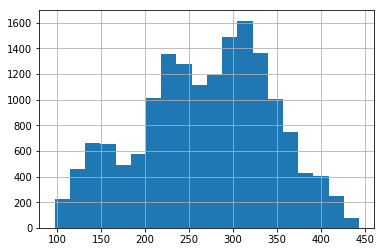

In [389]:
df_new['YearlyIncome'].hist(bins = 20)

Convert Categorical Column to Numerical

In [390]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
ohe = OneHotEncoder()

In [391]:
le_country = LabelEncoder()
ohe_country = OneHotEncoder()
le_country.fit(df_new['CountryRegionName'])
country_name = le_country.transform(df_new['CountryRegionName'])
ohe_country_name = ohe_country.fit(country_name.reshape(-1,1))
country_cat = ohe_country_name.transform(country_name.reshape(-1,1)).toarray()
country_cat.shape

(16404, 6)

In [392]:
le_education = LabelEncoder()
ohe_education = OneHotEncoder()
le_education.fit(df_new['Education'])
education = le_education.transform(df_new['Education'])
education_ohe = ohe_education.fit(education.reshape(-1,1))
education_cat= education_ohe.transform(education.reshape(-1,1)).toarray()
education_cat.shape

(16404, 5)

In [393]:
le_occ = LabelEncoder()
ohe_occ = OneHotEncoder()
le_occ.fit(df_new['Occupation'])
occupation = le_occ.transform(df_new['Occupation'])
occupation_ohe = ohe_occ.fit(occupation.reshape(-1,1))
occupation_cat = occupation_ohe.transform(occupation.reshape(-1,1)).toarray()
occupation_cat.shape

(16404, 5)

In [394]:
le_gen = LabelEncoder()
ohe_gen = OneHotEncoder()
le_gen.fit(df_new['Gender'])
gender = le_gen.transform(df_new['Gender'])
gender_ohe = ohe_gen.fit(gender.reshape(-1,1))
gender_cat = gender_ohe.transform(gender.reshape(-1,1)).toarray()
gender_cat.shape

(16404, 2)

In [395]:
le_mar = LabelEncoder()
ohe_mar = OneHotEncoder()
le_mar.fit(df_new['MaritalStatus'])
marital = le_mar.transform(df_new['MaritalStatus'])
marital_ohe = ohe_mar.fit(marital.reshape(-1,1))
marital_cat = marital_ohe.transform(marital.reshape(-1,1)).toarray()
marital_cat.shape

(16404, 2)

In [396]:
le_home = LabelEncoder()
ohe_home = OneHotEncoder()
le_home.fit(df_new['HomeOwnerFlag'])
home = le_home.transform(df_new['HomeOwnerFlag'])
home_ohe = ohe_home.fit(home.reshape(-1,1))
home_cat = home_ohe.transform(home.reshape(-1,1)).toarray()
home_cat.shape

(16404, 2)

In [397]:
le_car = LabelEncoder()
ohe_car = OneHotEncoder()
le_car.fit(df_new['NumberCarsOwned'])
cars = le_car.transform(df_new['NumberCarsOwned'])
cars_ohe = ohe_car.fit(cars.reshape(-1,1))
cars_cat = cars_ohe.transform(cars.reshape(-1,1)).toarray()
cars_cat.shape

(16404, 5)

In [398]:
le_childhome = LabelEncoder()
ohe_childhome = OneHotEncoder()
le_childhome.fit(df_new['NumberChildrenAtHome'])
childathome = le_childhome.transform(df_new['NumberChildrenAtHome'])
childathome_ohe = ohe_childhome.fit(childathome.reshape(-1,1))
childathome_cat = childathome_ohe.transform(childathome.reshape(-1,1)).toarray()
childathome_cat.shape

(16404, 6)

In [399]:
le_totalchild = LabelEncoder()
ohe_totalchild = OneHotEncoder()
le_totalchild.fit(df_new['TotalChildren'])
totalchild = le_totalchild.transform(df_new['TotalChildren'])
totalchild_ohe = ohe_totalchild.fit(totalchild.reshape(-1,1))
totalchild_cat = totalchild_ohe.transform(totalchild.reshape(-1,1)).toarray()
totalchild_cat.shape

(16404, 6)

Concatenate all the matrices of one-hot encodung created from categorical features

In [400]:
Cat_Features = np.concatenate((country_cat, education_cat, occupation_cat, gender_cat, marital_cat, home_cat, cars_cat, childathome_cat, totalchild_cat  ), axis =1)
Cat_Features.shape

(16404, 39)

Create Features and Label Columns

In [401]:
x = np.concatenate((Cat_Features, np.array(df_new['Age']).reshape(16404,1), np.array(df_new['YearlyIncome']).reshape(16404,1)), axis =1)
y = df_new['BikeBuyer']
X = pd.DataFrame(x)

In [402]:
X.head(3)

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.458087,371.412170
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.486076,318.026728
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.478497,303.224339


Split the Dataset into a Training & Test set

In [403]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11482, 41)
(4922, 41)
(11482,)
(4922,)


Normalize the numeric colums (Age & Yearly Income)

In [404]:
sc= StandardScaler()
sc.fit(X_train[[39, 40]])
X_train[[39, 40]] = sc.transform(X_train[[39, 40]])
X_test[[39, 40]] = sc.transform(X_test[[39, 40]])

C:\Users\fajanilanNB\AppData\Local\Continuum\Anaconda3.5\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\fajanilanNB\AppData\Local\Continuum\Anaconda3.5\lib\site-packages\pandas\core\frame.py:3144: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
C:\Users\fajanilanNB\AppData\Local\Continuum\Anaconda3.5\lib\site-packages\pandas\core\frame.py:3116: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [405]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
1702,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.635646,-0.713984
10165,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.539733,0.095246
7338,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.471070,1.006892
10183,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.497752,-0.287827
10460,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.037764,0.436236


In [406]:
from sklearn.ensemble import RandomForestClassifier

In [407]:
rfc = RandomForestClassifier(class_weight = 'balanced')
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [408]:
pred_train = rfc.predict(X_train)
pred_test = rfc.predict(X_test)

In [409]:
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support, accuracy_score, roc_curve, auc

In [410]:
print(classification_report(y_train, pred_train))
print(classification_report(y_test, pred_test))

             precision    recall  f1-score   support

          0       0.97      1.00      0.98      7667
          1       0.99      0.95      0.97      3815

avg / total       0.98      0.98      0.98     11482

             precision    recall  f1-score   support

          0       0.80      0.88      0.84      3286
          1       0.69      0.56      0.62      1636

avg / total       0.76      0.77      0.76      4922



In [411]:
print(confusion_matrix(y_train, pred_train))
print('\n')
print(confusion_matrix(y_test, pred_test))

[[7633   34]
 [ 205 3610]]


[[2876  410]
 [ 726  910]]


In [412]:
def print_metrics(labels, scores):
    metrics = precision_recall_fscore_support(labels, scores)
    conf = confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 ScoreNotPurchased    Score Purchased')
    print('Not Purchased     %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Purchased Bike    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy  %0.2f' % accuracy_score(labels, scores))
    print(' ')
    print('             No            Yes')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])


    
print_metrics(y_test, pred_test)  

                 Confusion matrix
                 ScoreNotPurchased    Score Purchased
Not Purchased       2876               410
Purchased Bike       726               910

Accuracy  0.77
 
             No            Yes
Num case     3286          1636
Precision    0.80          0.69
Recall       0.88          0.56
F1           0.84          0.62


In [413]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
inside = KFold(n_splits=10, shuffle = True)
outside = KFold(n_splits=10, shuffle = True)

In [414]:
## Define the dictionary for the grid search and the model object to search on
param_grid = {"max_features": [15, 20, 21, 22, 23, 24, 25, 30, 35], "min_samples_leaf":[30, 40, 42, 44, 46, 48, 50]}
## Define the random forest model
rf_clf = RandomForestClassifier(class_weight = "balanced") # class_weight = {0:0.33, 1:0.67}) 

## Perform the grid search over the parameters
rf_clf = GridSearchCV(estimator = rf_clf, param_grid = param_grid, 
                      cv = inside, # Use the inside folds
                      scoring = 'roc_auc',
                      return_train_score = True)
rf_clf.fit(x, y)
print(rf_clf.best_estimator_.max_features)
print(rf_clf.best_estimator_.min_samples_leaf)

22
44


In [415]:
from sklearn.model_selection import cross_val_score
cv_estimate = cross_val_score(rf_clf, X, y, 
                                 cv = outside) # Use the outside folds

print('Mean performance metric = %4.3f' % np.mean(cv_estimate))
print('SDT of the metric       = %4.3f' % np.std(cv_estimate))
print('Outcomes by cv fold')
for i, x in enumerate(cv_estimate):
    print('Fold %2d    %4.3f' % (i+1, x))

Mean performance metric = 0.861
SDT of the metric       = 0.009
Outcomes by cv fold
Fold  1    0.865
Fold  2    0.866
Fold  3    0.861
Fold  4    0.854
Fold  5    0.850
Fold  6    0.860
Fold  7    0.860
Fold  8    0.845
Fold  9    0.878
Fold 10    0.868


In [416]:
rf_mod = RandomForestClassifier(class_weight = "balanced", 
                                max_features = rf_clf.best_estimator_.max_features, 
                                min_samples_leaf = rf_clf.best_estimator_.min_samples_leaf) 
rf_mod.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features=22,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=44,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [417]:
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix, accuracy_score, roc_auc_score

In [418]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])

def print_metrics(labels, probs, threshold):
    scores = score_model(probs, threshold)
    metrics = precision_recall_fscore_support(labels, scores)
    conf = confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy        %0.2f' % accuracy_score(labels, scores))
    print('AUC             %0.2f' % roc_auc_score(labels, probs[:,1]))
    print('Macro precision %0.2f' % float((float(metrics[0][0]) + float(metrics[0][1]))/2.0))
    print('Macro recall    %0.2f' % float((float(metrics[1][0]) + float(metrics[1][1]))/2.0))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])
    
probabilities = rf_mod.predict_proba(X_test)
print_metrics(y_test, probabilities, 0.5)  

                 Confusion matrix
                 Score positive    Score negative
Actual positive      2510               776
Actual negative       398              1238

Accuracy        0.76
AUC             0.85
Macro precision 0.74
Macro recall    0.76
 
           Positive      Negative
Num case     3286          1636
Precision    0.86          0.61
Recall       0.76          0.76
F1           0.81          0.68


Check Feature Importances

Text(0,0.5,'Feature importance')

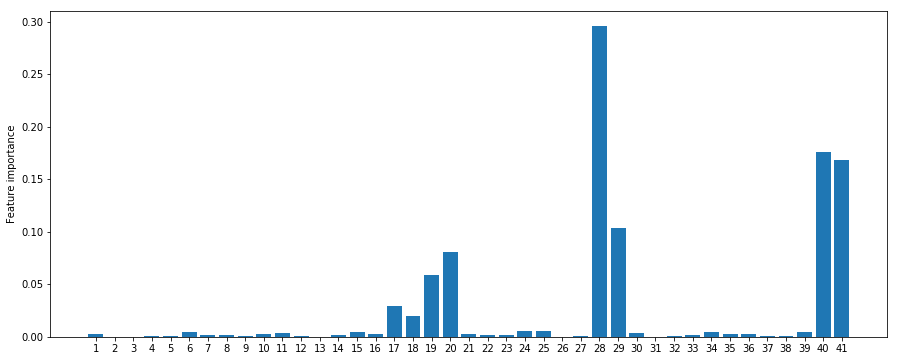

In [419]:
importance = rf_mod.feature_importances_
plt.figure(figsize = (15,6))
plt.bar(range(41), importance, tick_label = X_train.columns+1)
#plt.xticks(rotation=90)
plt.ylabel('Feature importance')

Upload Final Test Dataset

In [420]:
df_test = pd.read_csv('AW_test.csv')
df_test.head()

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
0,18988,NaN,Courtney,A,Baker,NaN,8727 Buena Vista Ave.,NaN,Fremont,California,...,1/5/1945,Bachelors,Management,F,S,0,2,0,5,86931
1,29135,NaN,Adam,C,Allen,NaN,3491 Cook Street,NaN,Haney,British Columbia,...,10/4/1964,Bachelors,Skilled Manual,M,M,1,2,2,4,100125
2,12156,NaN,Bonnie,NaN,Raji,NaN,359 Pleasant Hill Rd,NaN,Burbank,California,...,1/12/1934,Graduate Degree,Management,F,M,1,2,0,4,103985
3,13749,NaN,Julio,C,Alonso,NaN,8945 Euclid Ave.,NaN,Burlingame,California,...,9/22/1958,Graduate Degree,Skilled Manual,M,M,1,0,0,4,127161
4,27780,NaN,Christy,A,Andersen,NaN,"42, boulevard Tremblay",NaN,Dunkerque,Nord,...,3/19/1965,High School,Manual,F,M,1,1,2,2,21876


Replicate the Data Transformation steps performed in Train Datasets:
1. Create Age column using Birthdate column
2. Drop unnecessary columns
3. Check missing values
4. Transform Age and Yearly Income Columns 

In [421]:
df_CostumerID = df_test['CustomerID']

In [422]:
df_test['Age'] = pd.to_datetime('1998-01-01') - pd.to_datetime(df_test['BirthDate'])
df_test['Age'] = df_test['Age'].astype('timedelta64[D]').astype(int)
df_test['Age'] = df_test['Age']/365
df_test['Age'].head(3)

0    53.024658
1    33.265753
2    64.013699
Name: Age, dtype: float64

In [423]:
df_test = df_test.drop(['City', 'StateProvinceName', 'CustomerID', 'Title', 'FirstName', 'MiddleName', 'LastName', 'Suffix', 
                  'AddressLine1', 'AddressLine2','PostalCode', 'PhoneNumber', 'BirthDate', 'City'], axis =1)
print(df_test.shape)

(500, 11)


In [424]:
df_test.isnull().values.any()

False

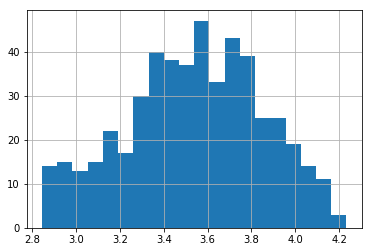

In [425]:
df_test['Age'] = df_test['Age'].apply(np.log)
df_test['YearlyIncome'] = df_test['YearlyIncome']**0.5
df_test['Age'].hist(bins = 20)

Transform the Categorical Columns into One-Hot Encoding based on the learning from 'fit' function of Train Set

In [426]:
country_name_test = le_country.transform(df_test['CountryRegionName'])
country_cat_test = ohe_country_name.transform(country_name_test.reshape(-1,1)).toarray()
country_cat_test.shape

(500, 6)

In [427]:
education_test = le_education.transform(df_test['Education'])
education_cat_test= education_ohe.transform(education_test.reshape(-1,1)).toarray()
education_cat_test.shape

(500, 5)

In [428]:
occupation_test = le_occ.transform(df_test['Occupation'])
occupation_cat_test = occupation_ohe.transform(occupation_test.reshape(-1,1)).toarray()
occupation_cat_test.shape

(500, 5)

In [429]:
gender_test = le_gen.transform(df_test['Gender'])
gender_cat_test = gender_ohe.transform(gender_test.reshape(-1,1)).toarray()
gender_cat_test.shape

(500, 2)

In [430]:
marital_test = le_mar.transform(df_test['MaritalStatus'])
marital_cat_test = marital_ohe.transform(marital_test.reshape(-1,1)).toarray()
marital_cat_test.shape

(500, 2)

In [431]:
home_test = le_home.transform(df_test['HomeOwnerFlag'])
home_cat_test = home_ohe.transform(home_test.reshape(-1,1)).toarray()
home_cat_test.shape

(500, 2)

In [432]:
cars_test = le_car.transform(df_test['NumberCarsOwned'])
cars_cat_test = cars_ohe.transform(cars_test.reshape(-1,1)).toarray()
cars_cat_test.shape

(500, 5)

In [433]:
childathome_test = le_childhome.transform(df_test['NumberChildrenAtHome'])
childathome_cat_test = childathome_ohe.transform(childathome_test.reshape(-1,1)).toarray()
childathome_cat_test.shape

(500, 6)

In [434]:
totalchild_test = le_totalchild.transform(df_test['TotalChildren'])
totalchild_cat_test = totalchild_ohe.transform(totalchild_test.reshape(-1,1)).toarray()
totalchild_cat_test.shape

(500, 6)

In [435]:
Cat_Features_Test = np.concatenate((country_cat_test, education_cat_test, occupation_cat_test, gender_cat_test, marital_cat_test, home_cat_test, cars_cat_test, childathome_cat_test, totalchild_cat_test), axis =1)
Cat_Features_Test.shape

(500, 39)

In [436]:
Features_test = np.concatenate((Cat_Features_Test, np.array(df_test['Age']).reshape(500,1), np.array(df_test['YearlyIncome']).reshape(500,1)), axis =1)
Features_test.shape

(500, 41)

In [437]:
Final_Features = pd.DataFrame(Features_test)
Final_Features.head(3)

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.970757,294.840635
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.504528,316.425347
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.159097,322.467053


In [438]:
Final_Features[[39, 40]] = sc.transform(Final_Features[[39, 40]])

Predict the class based on the selected learning model. In this case, random forest.

In [439]:
class_prediction = rf_mod.predict(Final_Features)

Output the prediction to csv file

In [440]:
ids = df_CostumerID
output = pd.DataFrame({ 'CustomerId' : ids, 'Purchased': class_prediction})
output.to_csv('Bike_Purchased_predictions.csv', index = False)
output.head()

,CustomerId,Purchased
0,18988,0
1,29135,1
2,12156,0
3,13749,0
4,27780,0


In [441]:
output.shape

(500, 2)